<a href="https://colab.research.google.com/github/kasey-rose/US-cost-of-living-dataset/blob/main/DIDA_325_Final_Project_US_Cost_of_Living.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Kasey Turtell and Marcus Minutello DIDA 325 Final Project:**
# **U.S. Cost of Living**

## Introduction

This dataset was grabbed from the website [Kaggle](https://www.kaggle.com/datasets/asaniczka/us-cost-of-living-dataset-3171-counties) for this analysis but was gathered by the Economic Policy Institute (EPI). The EPI used this datset, which they named "US Family Budget Dataset" in their Family Budget Calculator.

The dataset collected individual cost of living factors as well as total cost of living from 31430 individual households, across 1877 counties. There are 10 family types deemed by the EPI: one or two adults and zero to four children. The dataset also specifies the state, county, and area name that the household is in, if the household is in a metropolitan area, taxes paid by the household, and the median family income.

## Loading in Packages

In [1]:
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# Reading in Data

In [2]:
cost <- read.csv("https://raw.githubusercontent.com/kasey-rose/US-cost-of-living-dataset/main/cost_of_living_us.csv")

# Examining and Cleaning Data

In [3]:
head(cost, 3)

,case_id,state,isMetro,areaname,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,AL,True,"Montgomery, AL MSA",Autauga County,1p0c,8505.729,3454.917,10829.17,5737.480,4333.813,0.00,6392.945,39254.05,73010.41
2,1,AL,True,"Montgomery, AL MSA",Autauga County,1p1c,12067.502,5091.708,11588.19,8659.556,6217.459,6147.83,7422.078,57194.33,73010.41
3,1,AL,True,"Montgomery, AL MSA",Autauga County,1p2c,12067.502,7460.203,12361.78,11581.633,7075.658,15824.69,9769.562,76141.03,73010.41


**case_id** is a number assigned to each area

**isMetro** is the answer to "True or false, the area is metropolitan?"

all other columns are self-explanatory

*   **integer columns:** none
*   **categorical columns:** state, isMetro, county,
*   **character columns:** state, isMetro, county, family_members_count
*   **double colums:** housing_cost, food_cost, transportation_cost,
health_cost, other_necessities_cost, childcare_cost, taxes, total_cost, median_family_income



In [4]:
# Getting rid of the "case_id" and "areaname" columns in the dataset, as they are not needed in our visualizations
cost <- cost %>% select(-case_id, -areaname)

In [5]:
# Renaming the columns to better represent the data
cost <- cost %>% rename("metro.area" = isMetro, "family.members" = family_member_count, "housing.cost" = housing_cost, "food.cost" = food_cost, "transportation.cost" = transportation_cost, "health.cost" = healthcare_cost, "other.nec.cost" = other_necessities_cost, "child.cost" = childcare_cost, "total.cost" = total_cost, "median.fam.income" = median_family_income) %>% na.omit()

In [6]:
# Creating a new dataset including a "dispo" column, which is disposable income
  # disposable income is calculated by subtracting total cost of living from the median family income
cost.dis <- cost %>% mutate(dispo = median.fam.income-total.cost)

In [7]:
# Making two new columns, representing the number of parents in the household and the number of kids in the houshold
  # by taking the corresponding number from the "family.members" column and making it a new column, seperating parents from children
parents <- substr(cost$family.members, 1, 1)
kids <- substr(cost$family.members, 3, 3)
# Adding the two new columns two the dataset as numeric columns
cost <- cost %>% mutate(number.parents = as.numeric(parents)) %>% mutate(number.kids = as.numeric(kids))

In [8]:
# Creating another dataset only containing households with children to be used in questions 2 and 3
cost2 <- cost %>% filter(number.kids > 0)

In [9]:
# Creating another dataset with an additional column designating what part of the United States the houshold is in to be used in question 4
cost1 <- cost %>% mutate(region = state)
cost1 <- cost1 %>%
  mutate(
    # Replace missings, but leave everything else alone
    state = case_match(state, NA ~ "unknown", .default = state),
    # Replace some, but not all, of the species
    region = case_match(
      region,
      c("WA", "WY", "AK", "CA", "CO", "HI", "ID", "MT", "NV", "OR", "UT") ~ "West",
      c("ND", "SD", "NE", "KS", "MN", "IA", "MO", "WI", "IL", "IN", "MI", "OH") ~ "Midwest",
      c("NY", "PA", "VT", "NH", "MA", "CT", "RI", "ME", "DE", "MD", "NJ", "DC") ~ "Northeast",
      c("AZ", "NM", "TX", "OK") ~ "Southwest",
      c("AR", "LA", "MS", "AL", "TN", "KY", "GA", "FL", "SC", "NC", "VA", "WV") ~ "Southeast",
      .default = region
    )
  )

# **1. Do Metropolitan areas tend to have higher costs of living?**

> ## Data Visualization



In [10]:
house <- ggplot(data = cost) +
  geom_boxplot(aes( x = housing.cost, color=metro.area)) +
  facet_wrap(~metro.area) +
  xlab("Housing Cost") +
  coord_flip() +
  ylab("Number of Households") +
  labs( color = "Is The Area Metropolitan?") +
  ggtitle("Housing Costs Based on Area Type") +
  theme(plot.title = element_text(size=20), axis.title=element_text(size=20))

In [11]:
food <- ggplot(data = cost) +
  geom_boxplot(aes( x = food.cost, color=metro.area)) +
  facet_wrap(~metro.area) +
  coord_flip() +
  xlab("Food Cost") +
  ylab("Number of Households") +
  labs( color = "Is The Area Metropolitan?") +
  ggtitle("Food Costs Based on Area Type") +
  theme(plot.title = element_text(size=20), axis.title=element_text(size=20))

In [12]:
transport<- ggplot(data = cost) +
  geom_boxplot(aes( x = transportation.cost, color=metro.area)) +
  facet_wrap(~metro.area) +
  coord_flip() +
  xlab("Transportation Cost") +
  ylab("Number of Households") +
  labs( color = "Is The Area Metropolitan?") +
  ggtitle("Transportation Costs Based on Area Type") +
  theme(plot.title = element_text(size=16), axis.title=element_text(size=20))

In [13]:
health <- ggplot(data = cost) +
  geom_boxplot(aes( x = health.cost, color=metro.area)) +
  facet_wrap(~metro.area) +
  coord_flip() +
  xlab("Health Care Cost") +
  ylab("Number of Households") +
  labs( color = "Is The Area Metropolitan?") +
  ggtitle("Healthcare Costs Based on Area Type") +
  theme(plot.title = element_text(size=18), axis.title=element_text(size=20))

In [14]:
children <- ggplot(data = cost) +
  geom_boxplot(aes( x = child.cost, color=metro.area)) +
  facet_wrap(~metro.area) +
  coord_flip() +
  xlab("Child Care Cost") +
  ylab("Number of Households") +
  labs( color = "Is The Area Metropolitan?") +
  ggtitle("Childcare Costs Based on Area Type") +
  theme(plot.title = element_text(size=18), axis.title=element_text(size=20))

In [15]:
other <- ggplot(data = cost) +
  geom_boxplot(aes( x = other.nec.cost, color=metro.area)) +
  facet_wrap(~metro.area) +
  coord_flip() +
  xlab("Other Necessary Costs") +
  ylab("Number of Households") +
  labs( color = "Is The Area Metropolitan?") +
  ggtitle("Other Necessary Costs Based on Area Type") +
  theme(plot.title = element_text(size=15), axis.title=element_text(size=20))

In [16]:
totals <- ggplot(data = cost) +
  geom_boxplot(aes( x = total.cost, color=metro.area)) +
  facet_wrap(~metro.area) +
  coord_flip() +
  xlab("Total Cost of Living") +
  ylab("Number of Households") +
  labs( color = "Is The Area Metropolitan?") +
  ggtitle("Total Cost of Living Based on Area Type") +
  theme(plot.title = element_text(size=16), axis.title=element_text(size=20))

In [17]:
median <- ggplot(data = cost) +
  geom_boxplot(aes( x = median.fam.income, color=metro.area)) +
  facet_wrap(~metro.area) +
  coord_flip() +
  xlab("Household Income") +
  ylab("Number of Households") +
  labs( color = "Is The Area Metropolitan?") +
  ggtitle("Median Family Income Based on Area Type") +
  theme(plot.title = element_text(size=15), axis.title=element_text(size=20))

In [18]:
disposable <- ggplot(data = cost.dis) +
  geom_boxplot(aes( x = dispo, color=metro.area)) +
  facet_wrap(~metro.area) +
  coord_flip() +
  xlab("Household Disposable Income") +
  ylab("Number of Households") +
  labs( color = "Is The Area Metropolitan?") +
  ggtitle("Disposable Income Based on Area Type") +
  theme(plot.title = element_text(size=17), axis.title=element_text(size=20))

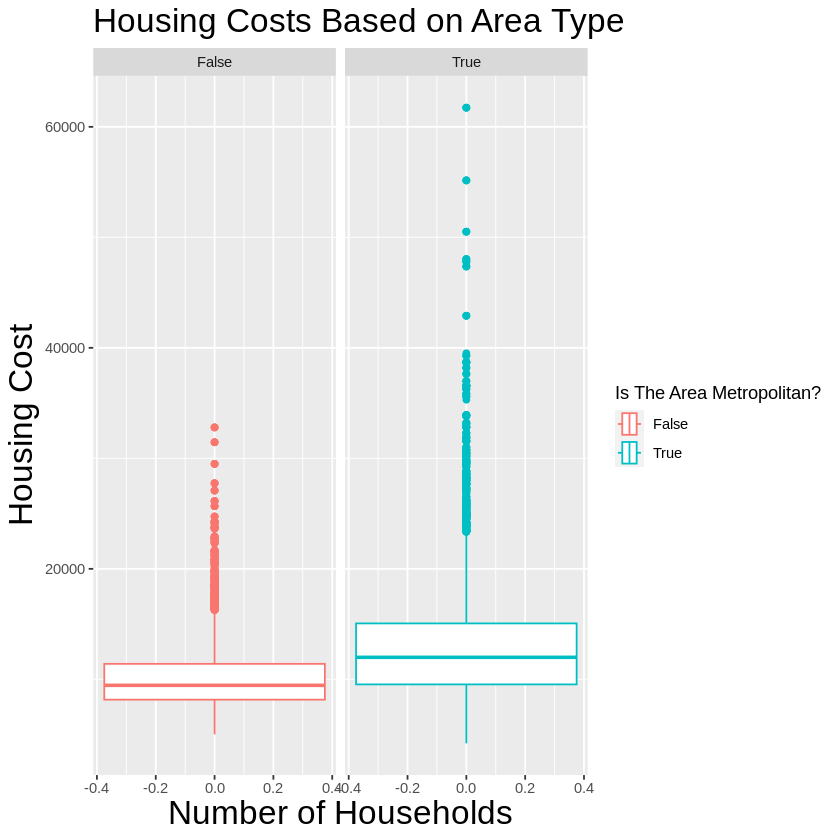

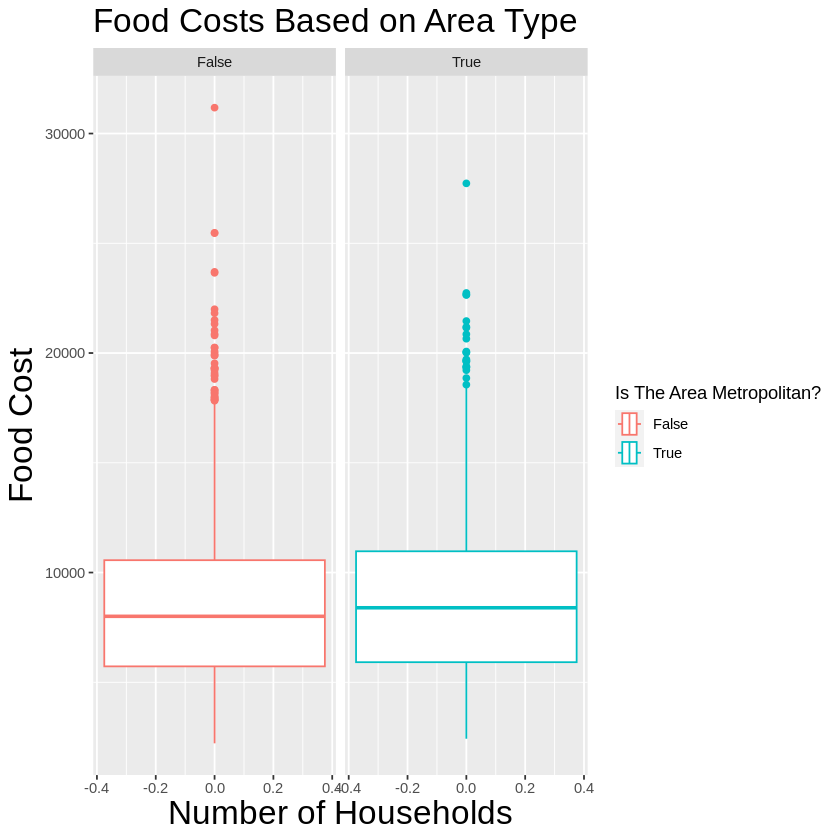

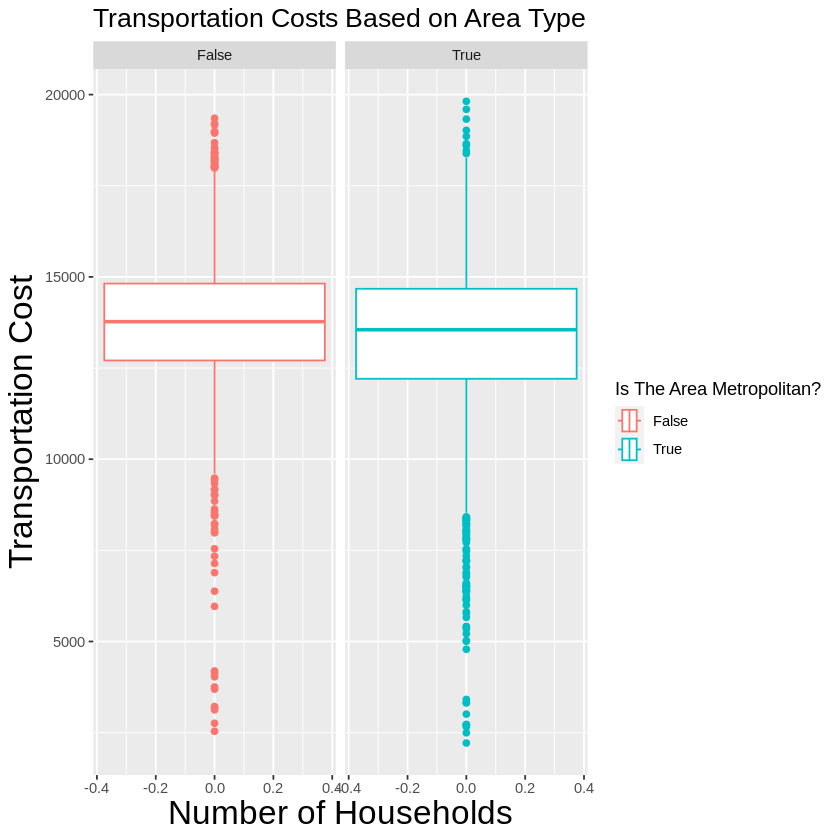

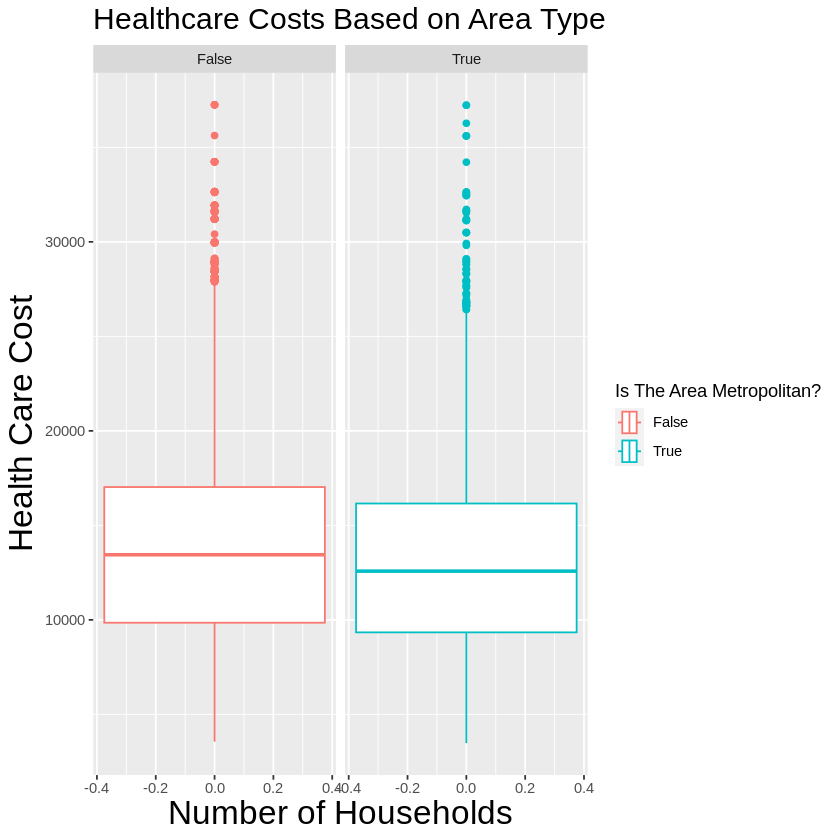

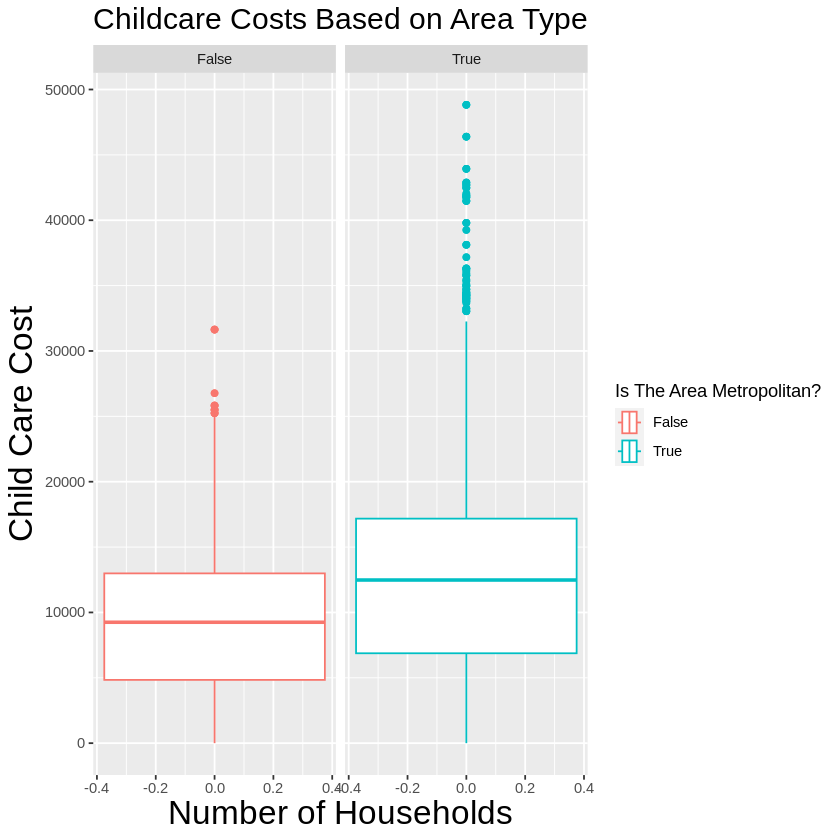

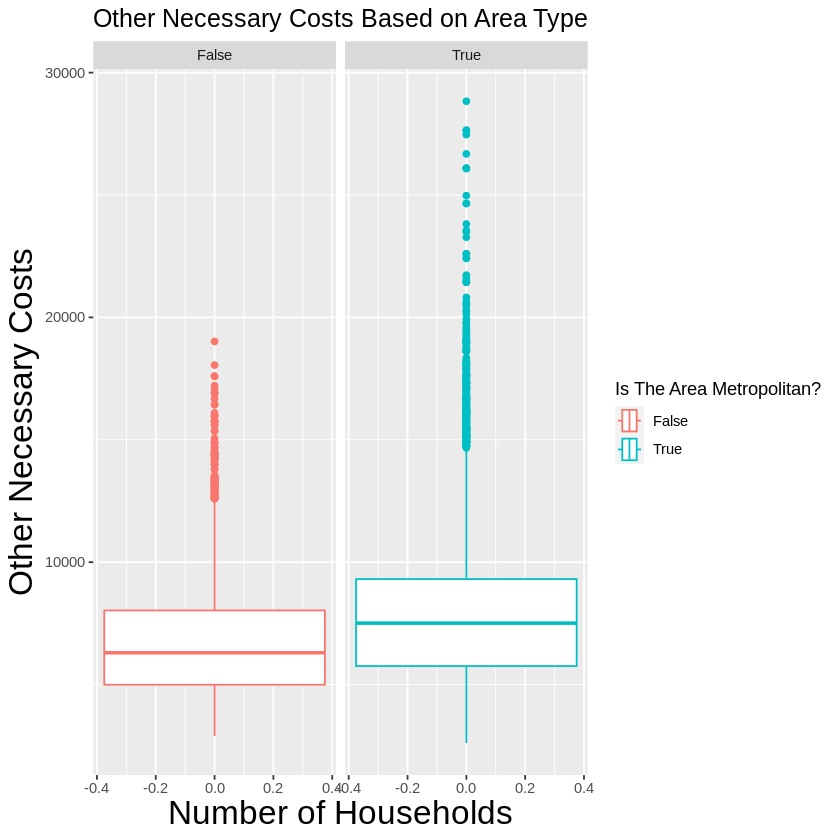

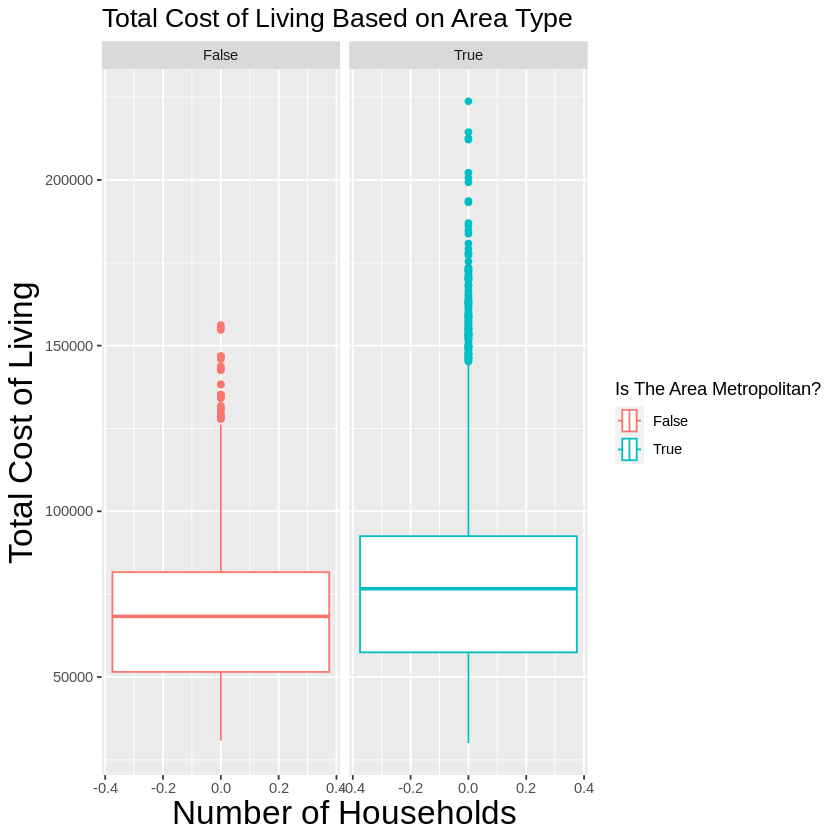

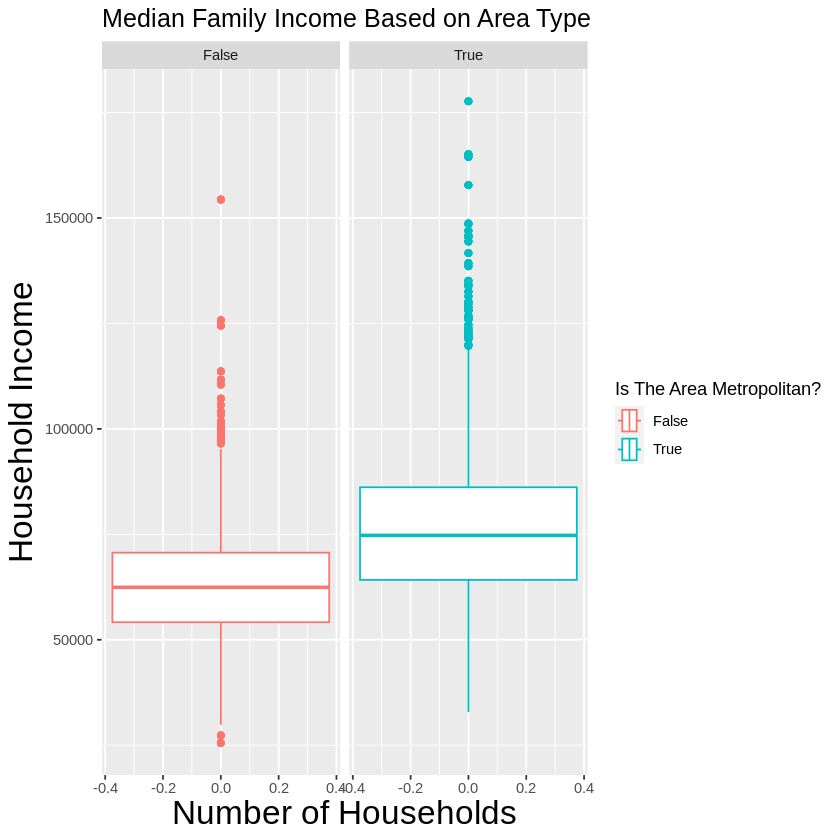

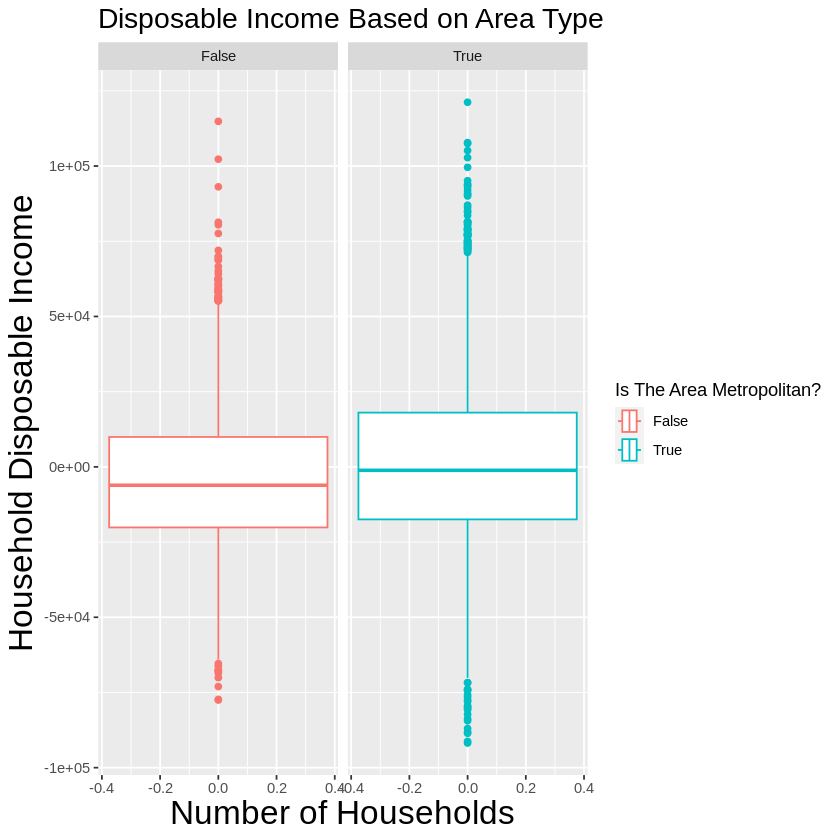

In [19]:
house
food
transport
health
children
other
totals
median
disposable

## Conclusions:

The boxplots above deomonstrate each cost of living factor broken down by area type as well as the total cost of living, family income, and the disposable income (calculated by subtracting total cost of living from family income) by area type. The plots demonstrate that for housing, food, childcare, and miscellaneous costs as well as total cost of living are all higher in metropolitan areas. However, the only two factors that were did not cost more in metropolitan areas were transportation and healthcare costs. This may be due to the inherently more spread out nature of rural and suburban areas, leading to less accessible public transportation as well as less accessible medical care. When looking at the plots depicting median household income and disposable income, we can see that they are both higher in metropolitan areas, particularly the median household income is much higher. It is possible that this is a result of the higher costs of living in cities. Alternatively, the higher wage, white collar jobs are typically located in cities, and that may have driven up the demand for city living as demand in white collar industries went up and therefore the cost of living in cities increased as well.

# **2. Does higher childcare cost tend to mean that other cost of living factors are higher?**

> ## Data Visualization

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


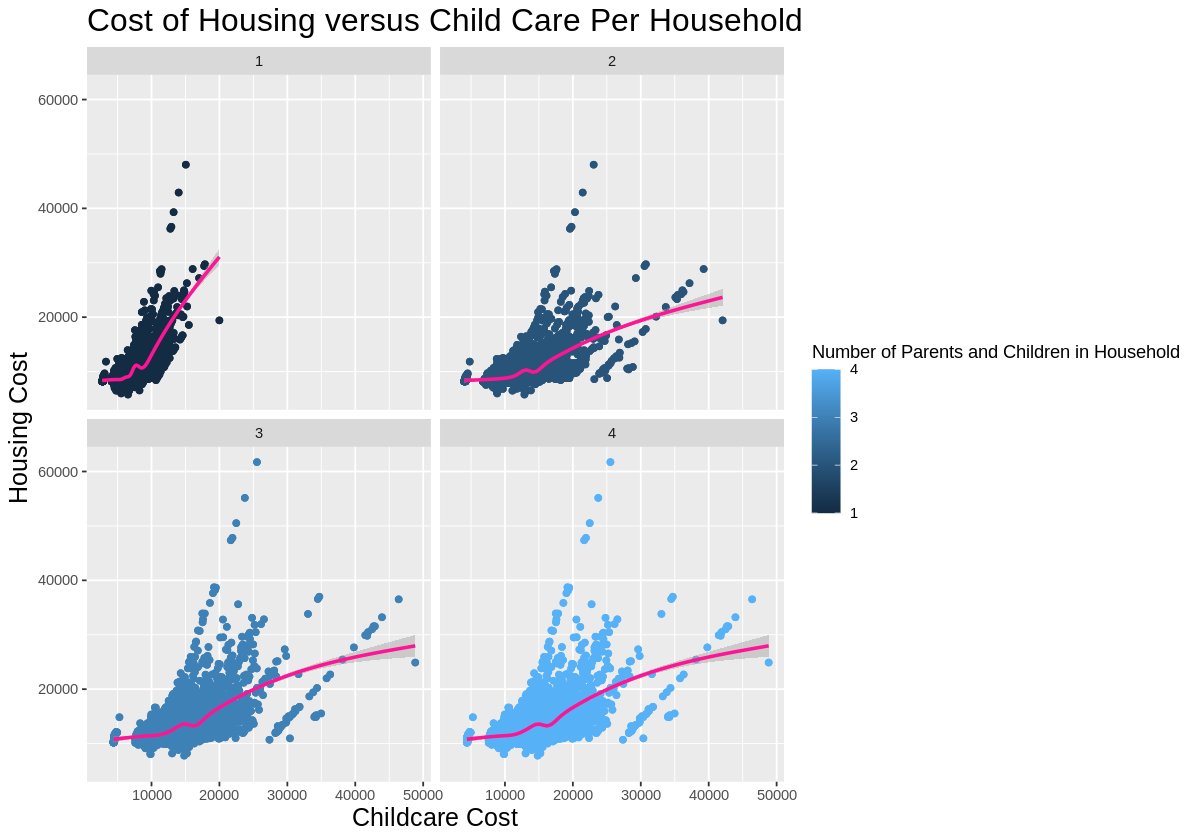

In [20]:
options(repr.plot.width = 10, repr.plot.height =7)
ggplot(data = cost2) +
  geom_point( aes(x = child.cost, y=housing.cost, color=number.kids)) +
  xlab("Childcare Cost") +
  ylab("Housing Cost") +
  labs(color = "Number of Parents and Children in Household") +
  ggtitle("Cost of Housing versus Child Care Per Household") +
  theme(plot.title = element_text(size=19), axis.title=element_text(size=15)) +
  geom_smooth( aes(x=child.cost, y=housing.cost), color = "deeppink") + facet_wrap(~number.kids)

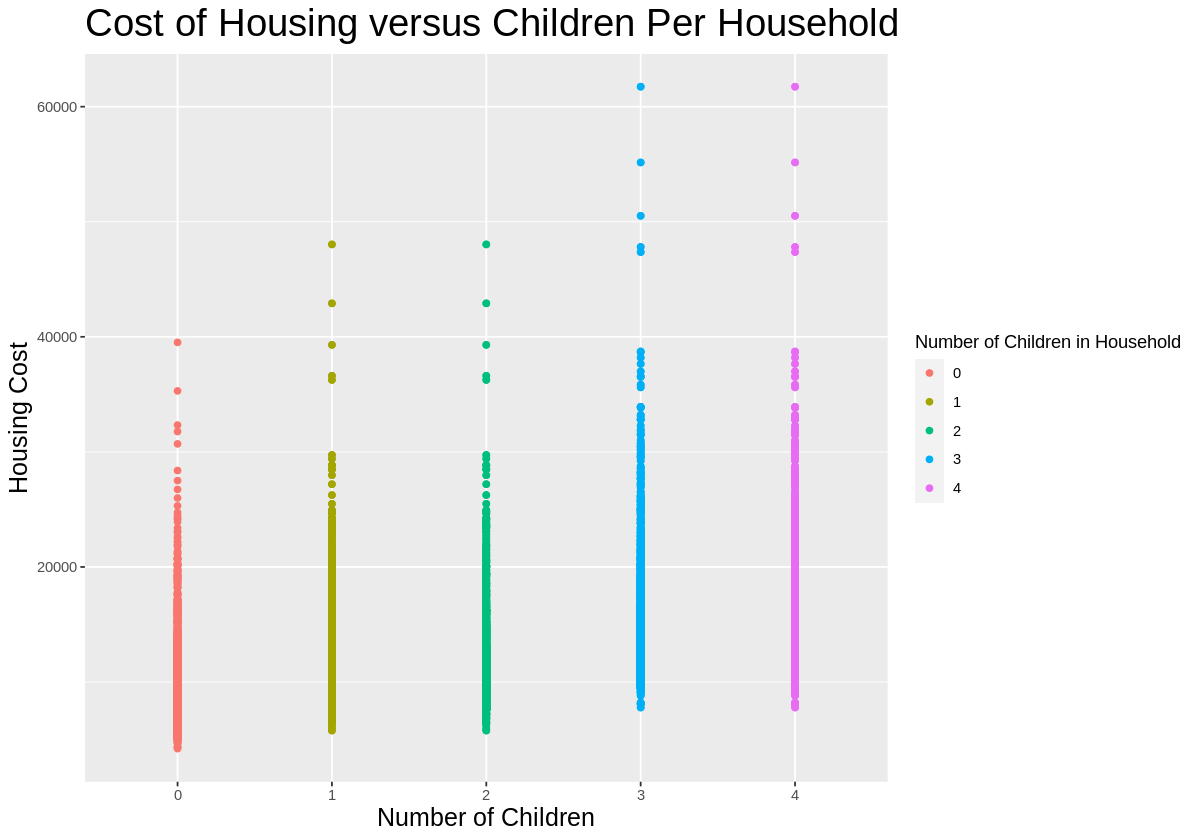

In [21]:
ggplot(data=cost) +
  geom_point(aes(x=kids, y=housing.cost, color=kids)) +
    xlab("Number of Children") +
    ylab("Housing Cost") +
    labs(color = "Number of Children in Household") +
    ggtitle("Cost of Housing versus Children Per Household") +
    theme(plot.title = element_text(size=23), axis.title=element_text(size=15))

## Conclusions:

The above plots demonstrate that, both as childcare costs increase and as the number of children increase, the cost of housing increases as well. The first graph visualizes the tendency for housing costs to increast as childcare costs increase, and as this graph is facet wrapped by the number of kids in the household, we can see that there is a much sharper increase in the plot of households with only children than the housholds with 2-4 children. Upon speculation, this could be due to the lower childcare costs requied with one child than with multiple. The second plot, we can clearly see that as the number of children increases, the housing costs increases as well. This is most likely due to the additional space needed when a family expands, typically leading them to need a larger, more expensive house.

# **3. How accurately can we predict childcare based on general costs?**

> ## Multilinear regression

In [22]:
set.seed(37)

split <- 0.75
rows  <- nrow(cost2)

train.entries <- sample(rows, rows*split)

cost2.train <- cost2[train.entries, ]
cost2.valid  <- cost2[-train.entries,  ]
head(cost2.train)

,state,metro.area,county,family.members,housing.cost,food.cost,transportation.cost,health.cost,other.nec.cost,child.cost,taxes,total.cost,median.fam.income,number.parents,number.kids
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3254,GA,False,Camden County,2p2c,10392.00,10133.96,14459.53,13579.05,7437.366,9318.301,7374.899,72695.11,64371.73,2,2
5167,IL,False,Lawrence County,2p3c,10932.00,10396.08,15014.43,24921.85,7728.005,13521.623,10463.734,92977.72,61949.44,2,3
9752,MA,True,Berkshire County,2p4c,17494.15,16485.25,15524.13,18101.48,12312.076,24450.948,14990.210,119358.25,81352.34,2,4
14339,NJ,True,Sussex County,1p3c,26099.67,11984.53,14535.63,12204.22,13799.408,23344.091,19871.360,121838.90,112331.69,1,3
22248,UT,False,Carbon County,2p4c,11916.00,13215.08,15902.30,21331.34,9105.980,17579.938,10302.594,99353.23,65240.42,2,4
23076,VA,False,Nottoway County,1p4c,12612.00,10828.63,13620.54,15776.26,8493.467,12916.646,8276.883,82524.43,58330.91,1,4


In [23]:
model <- lm(child.cost ~ housing.cost + food.cost + transportation.cost + health.cost , data=cost2.train)

In [24]:
summary(model)


Call:
lm(formula = child.cost ~ housing.cost + food.cost + transportation.cost + 
    health.cost, data = cost2.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-18838.6  -2620.5   -633.8   2310.8  26811.2 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          1.144e+03  3.003e+02   3.810  0.00014 ***
housing.cost         5.308e-01  8.657e-03  61.314  < 2e-16 ***
food.cost            7.055e-01  1.850e-02  38.132  < 2e-16 ***
transportation.cost -2.729e-02  2.502e-02  -1.091  0.27545    
health.cost         -8.332e-02  9.647e-03  -8.637  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3862 on 18847 degrees of freedom
Multiple R-squared:  0.4414,	Adjusted R-squared:  0.4412 
F-statistic:  3723 on 4 and 18847 DF,  p-value: < 2.2e-16


In [25]:
cost2.train <- cost2.train %>%
    mutate(yhat = predict(model, newdata=cost2.train)) %>%
    mutate(residual = child.cost - yhat)

cost2.valid <- cost2.valid %>%
    mutate(yhat = predict(model, newdata=cost2.valid)) %>%
    mutate(residual = child.cost - yhat)

Warning message:
“Removed 3 rows containing missing values (`geom_point()`).”


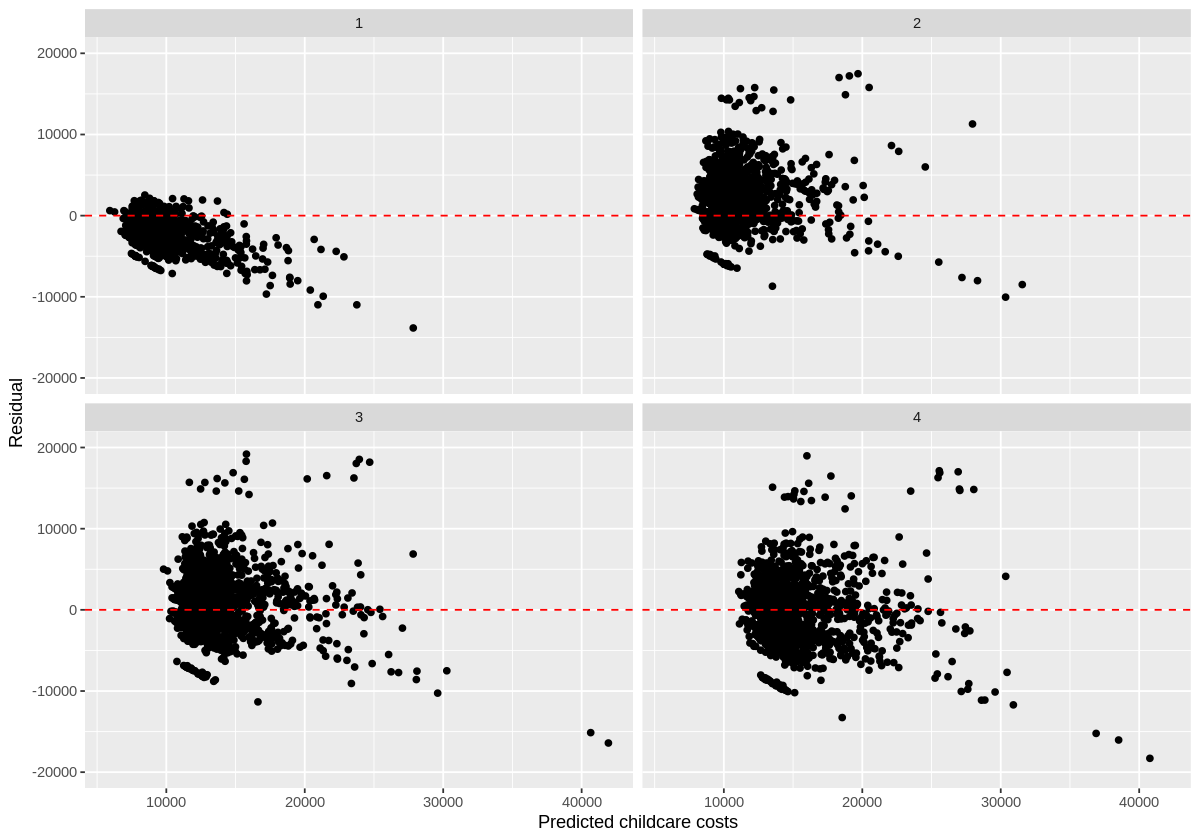

In [26]:
ggplot(cost2.valid) +
  geom_point(aes(x=yhat, y=residual)) +
  geom_hline(aes(yintercept=0), linetype="dashed", color="red") +
  ylim(-20000,20000) +
  xlab("Predicted childcare costs") +
  ylab("Residual") +
  facet_wrap(~number.kids)

In [27]:
sd(cost2.valid$residual)

[1] 3850.863

In [28]:
sd(cost2.train$residual)

[1] 3861.25

## Conclusions:

We can not predict childcare costs very accurately based on other costs. The typical error is +-$3850. I think this is the case because the other costs don't have a direct effect on how much a child should cost. Food cost and health cost should have some correlation with child cost which is the reason that there is some relationship between them. However this dataset shows not a very strong relationship between these variables

# **4. Do Regions cluster together when looking at cost of living factors?**

> ## Clustering


In [29]:
cost1.numeric <- cost1 %>% select_if(is.numeric)

Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 1571000)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 1571000)”


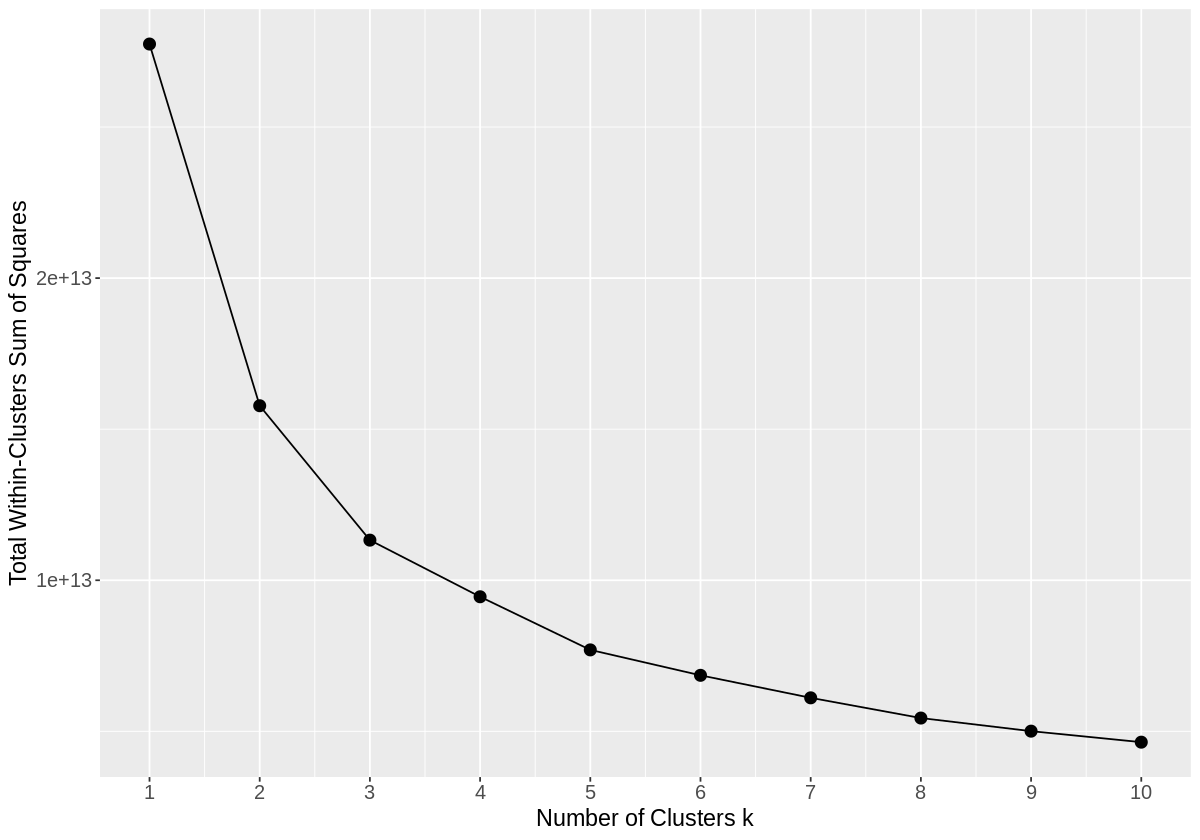

In [30]:
k.max <- 10
data <- cost1.numeric


wss <- sapply(1:k.max,
              function(k){kmeans(data, k, nstart=10,iter.max = 15)$tot.withinss})
wss.data <- data.frame(k=1:k.max, wss=wss)
ggplot(wss.data) +
  geom_line(aes(x=k, y=wss)) +
  geom_point(aes(x=k, y=wss), size=3) +
  xlab("Number of Clusters k") +
  ylab("Total Within-Clusters Sum of Squares") +
  theme(axis.title=element_text(size=14), axis.text=element_text(size=12)) +
  scale_x_continuous(breaks=seq(1,k.max,1))

In [31]:
kclust <- kmeans(cost1.numeric, 4, nstart=10)
kclust$centers

Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 1571000)”


,housing.cost,food.cost,transportation.cost,health.cost,other.nec.cost,child.cost,taxes,total.cost,median.fam.income,number.parents,number.kids
1,8284.849,4684.195,12177.84,8190.818,4699.196,2490.348,5850.799,46378.05,67400.35,1.342613,0.3971432
2,12876.046,10886.795,14631.94,17252.604,8610.214,14991.311,9118.815,88367.73,72387.28,1.615961,3.1017629
3,9986.346,8551.523,13796.43,14351.760,6717.001,10038.893,6421.461,69863.41,57848.67,1.525671,2.3033839
4,21134.463,11774.863,14398.96,15068.909,11924.346,19917.168,15468.283,109686.99,105893.58,1.570946,2.8764479


In [32]:
clustertable <-table(kclust$cluster, cost1$region)
clustertable

   
    Midwest Northeast Southeast Southwest West
  1    3425       616      3232      1264 1054
  2    3921       879      2189       906 1578
  3    2827       310      4843      1530  774
  4     377       645       366        90  594

In [33]:
#Row sums
print(paste("Cluster 1 size: ", 3425 + 616 +3232 +1264 + 1054))
print(paste("Cluster 2 size: ", 2827 +310 +4843 +1530 +774))
print(paste("Cluster 3 size: ", 3921 +879 +2189 +906 +1578))
print(paste("Cluster 4 size: ", 377 +645 +366 +90+594))

[1] "Cluster 1 size:  9591"
[1] "Cluster 2 size:  10284"
[1] "Cluster 3 size:  9473"
[1] "Cluster 4 size:  2072"


In [34]:
#Column sums
print(paste("Midwest: ", 3425 +3921 +2827 +377))
print(paste("Northeast: ", 616 +879 +310 + 645))
print(paste("Southeast: ", 3232+2189+4843+366))
print(paste("Southwest: ", 1264+906+1530+90))
print(paste("West: ", 1054+1578+774+594))

[1] "Midwest:  10550"
[1] "Northeast:  2450"
[1] "Southeast:  10630"
[1] "Southwest:  3790"
[1] "West:  4000"


In [35]:
#Ratio in the highest total cost cluter to amount of families in region
print(paste("Midwest: ", 377/10550))
print(paste("Northeast: ", 645/2450))
print(paste("Southeast: ", 366/10630))
print(paste("Southwest: ", 90/3790))
print(paste("West: ", 594/4000))

[1] "Midwest:  0.0357345971563981"
[1] "Northeast:  0.263265306122449"
[1] "Southeast:  0.0344308560677328"
[1] "Southwest:  0.0237467018469657"
[1] "West:  0.1485"


In [36]:
#Ratio in the lowest total cost cluter to amount of families in region
print(paste("Midwest: ", 3425/10550))
print(paste("Northeast: ", 616/2450))
print(paste("Southeast: ", 3232/10630))
print(paste("Southwest: ", 1264/3790))
print(paste("West: ", 1054/4000))

[1] "Midwest:  0.324644549763033"
[1] "Northeast:  0.251428571428571"
[1] "Southeast:  0.304045155221072"
[1] "Southwest:  0.333509234828496"
[1] "West:  0.2635"


## Conclusions:

Looking at total cost it is clear that the 4 clusters have approximately a $20,000 difference in total cost.

Out of the 7 cost variables that add together to make the total cost, the lowest total cost cluster has the lowest values in each category, the second lowest has the second lowest values in each category.

But then for the second highest and highest total cost clusters the transportation cost and health cost for the second highest cluster is higher than that of the highest total cost cluster.

An interesting result is that the median income for a family in the lowest total cost cluster is higher than the median income for a family in the second lowest total cost cluster by about $10,000

Also all of the cluster center incomes are lower than the total costs.

###Looking at how these clusters compare to the regions:

The Northeast region has the least amount of representation in this data set (2450 families) but have the most families out of all the regions in the highest total cost cluster.

The Midwest and Southeast are very similar. They have the most representation  with 10550 and 10630 respectively. They also have a similar spread throughout the clusters. Having similar amounts in each cluster. Both regions have very little families in the highest total cost cluster compared to the other clusters.

The Southwest and West are also similar in size with 3790 and 4000 families.
However the West has a lot more families in the highest total cost cluster than the Southwest, 594 to 90.

Comparing the ratios in the highest and lowest total cost clusters: The Northeast has the highest proportion in the highest total cost cluster. which means that in the northeast there are more people proportionally who have a high total cost. In the lowest total cost cluster every region has a similar proportion.

With these results it seems that the regions do not cluster together based on cost of living because there are not very significant differences in total costs between each region

